In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def ebfe_fit_naprime(Zs, beta, alpha, b_prime):
    Z1, Z2 = Zs.T
    return(-beta/2*(Z1**(7/3)+Z2**(7/3))+2*alpha+2*b_prime*Z1*Z2)

In [3]:
energies = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies.txt')
ebfe_exp = energies[:,1]*2600
nbfe = energies[:,2]*2600
ref_bde = -energies[:,0]*2600

#ref_bde = np.array([359.2, 337.7, 370.2, 452, 259.6, 253.5, 283.6, 195.2, 194.9, 151.7])
#ebfe_exp = -ref_bde-nbfe


In [4]:
xdata = np.array([[6,6], [6,7], [6,8], [6,9], [7,7], [7,8], [7,9], [8,8], [8,9], [9,9]])

out_naprime = curve_fit(ebfe_fit_naprime, xdata, ebfe_exp)

bde_fit_naprime = -(ebfe_fit_naprime(xdata, out_naprime[0][0], out_naprime[0][1], out_naprime[0][2]) + nbfe)

mae_naprime = np.abs(bde_fit_naprime-ref_bde).mean()

In [5]:
mae_naprime

4.117130841252345

Text(0.5, 0, 'sat. diatomic')

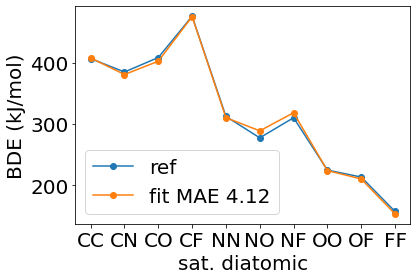

In [6]:
comps = ['CC','CN','CO','CF','NN','NO','NF','OO', 'OF', 'FF']
plt.rcParams['font.size'] = 20

plt.plot(comps, ref_bde, '-o', label = 'ref')

plt.plot(comps, bde_fit_naprime, '-o', label = f'fit MAE {np.round(mae_naprime,2)}')


plt.legend()
plt.ylabel('BDE (kJ/mol)')
plt.xlabel('sat. diatomic')
#plt.legend(bbox_to_anchor = (1.05,1))